In [1]:
import pandas as pd #importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Company A - Data.csv') #read dataset 

In [3]:
df.shape #dimensions of dataset 

(5986, 22)

In [73]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [6]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  5


,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1869,0,72,24.10,1734.65
1,4528,0,44,88.15,3973.20
2,6344,1,38,74.95,2869.85
3,6739,0,4,55.90,238.50
4,432,0,2,53.45,119.50


In [8]:
df.rename(columns={'Unnamed: 0': 'RowID'}, inplace =True)

In [11]:
df.head()

,RowID,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [12]:
df['RowID'].nunique()

5986

In [13]:
df['SeniorCitizen'].nunique() #no further processing required

2

In [14]:
df['tenure'].nunique()

73

In [15]:
df['MonthlyCharges'].nunique()

1526

<AxesSubplot:>

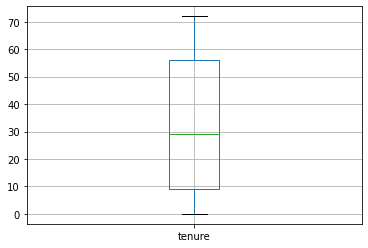

In [16]:
df.boxplot(column='tenure')

C:\Users\theje\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

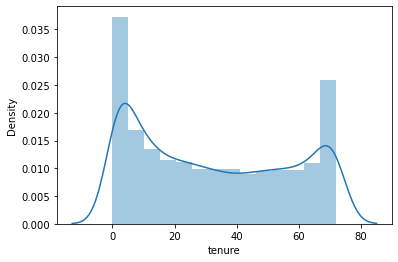

In [17]:
sns.distplot(df['tenure'])

In [30]:
df['tenure'].describe()

count    5986.000000
mean       32.468760
std        24.516391
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

<AxesSubplot:>

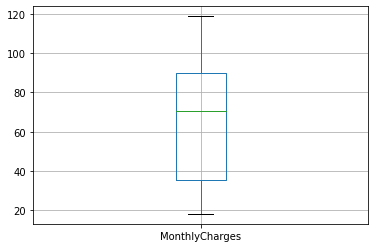

In [18]:
df.boxplot(column='MonthlyCharges')

C:\Users\theje\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

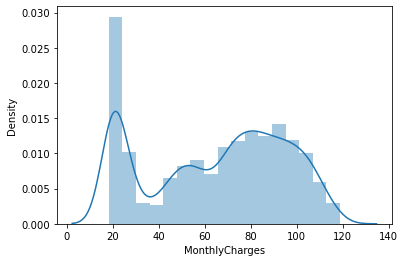

In [19]:
sns.distplot(df['MonthlyCharges'])

In [31]:
df['MonthlyCharges'].describe()

count    5986.000000
mean       64.802213
std        30.114702
min        18.250000
25%        35.650000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

Categorical Feature Handling 

In [20]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [21]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is customerID and number of categories are 5986
The feature is gender and number of categories are 2
The feature is Partner and number of categories are 2
The feature is Dependents and number of categories are 2
The feature is PhoneService and number of categories are 2
The feature is MultipleLines and number of categories are 3
The feature is InternetService and number of categories are 3
The feature is OnlineSecurity and number of categories are 3
The feature is OnlineBackup and number of categories are 3
The feature is DeviceProtection and number of categories are 3
The feature is TechSupport and number of categories are 3
The feature is StreamingTV and number of categories are 3
The feature is StreamingMovies and number of categories are 3
The feature is Contract and number of categories are 3
The feature is PaperlessBilling and number of categories are 2
The feature is PaymentMethod and number of categories are 4
The feature is Churn and number of categories are 2


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])

In [27]:
df.shape

(5986, 22)

In [28]:
df.drop(columns=['RowID', 'customerID'], inplace= True)

In [29]:
df.shape

(5986, 20)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   int32  
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   int32  
 3   Dependents        5986 non-null   int32  
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   int32  
 6   MultipleLines     5986 non-null   int32  
 7   InternetService   5986 non-null   int32  
 8   OnlineSecurity    5986 non-null   int32  
 9   OnlineBackup      5986 non-null   int32  
 10  DeviceProtection  5986 non-null   int32  
 11  TechSupport       5986 non-null   int32  
 12  StreamingTV       5986 non-null   int32  
 13  StreamingMovies   5986 non-null   int32  
 14  Contract          5986 non-null   int32  
 15  PaperlessBilling  5986 non-null   int32  
 16  PaymentMethod     5986 non-null   int32  


In [33]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.007447,-0.007791,0.009083,0.003207,-0.004913,0.000654,-0.001858,-0.020759,-0.018045,-0.003010,-0.008468,-0.008193,-0.007297,-0.001843,-0.013990,0.015745,-0.014286,-0.003664,-0.009548
SeniorCitizen,-0.007447,1.000000,0.014867,-0.214233,0.005468,0.009464,0.135743,-0.033614,-0.127915,-0.017460,-0.019911,-0.152474,0.026869,0.042940,-0.149406,0.155691,-0.037653,0.219387,0.093807,0.150097
Partner,-0.007791,0.014867,1.000000,0.449029,0.381976,0.024926,0.147910,0.006319,0.161958,0.162627,0.165875,0.133171,0.143919,0.134082,0.300549,-0.018037,-0.151566,0.104006,0.321349,-0.146840
Dependents,0.009083,-0.214233,0.449029,1.000000,0.163710,-0.000579,-0.023180,0.046719,0.158121,0.090680,0.077105,0.139518,0.046075,0.023928,0.246163,-0.112405,-0.038302,-0.115803,0.062691,-0.160204
tenure,0.003207,0.005468,0.381976,0.163710,1.000000,0.010392,0.350499,-0.030184,0.328139,0.367155,0.372424,0.326081,0.292981,0.307437,0.671551,0.006569,-0.359652,0.256983,0.827756,-0.348469
PhoneService,-0.004913,0.009464,0.024926,-0.000579,0.010392,1.000000,-0.017479,0.390024,-0.011130,0.027494,0.002764,-0.012189,0.055582,0.047035,0.005267,0.021340,-0.003853,0.251029,0.117165,0.009421
MultipleLines,0.000654,0.135743,0.147910,-0.023180,0.350499,-0.017479,1.000000,-0.106981,0.012582,0.125375,0.126047,0.015052,0.170890,0.184659,0.113906,0.169703,-0.176295,0.436869,0.458812,0.034943
InternetService,-0.001858,-0.033614,0.006319,0.046719,-0.030184,0.390024,-0.106981,1.000000,-0.023363,0.032665,0.044264,-0.021814,0.105667,0.091993,0.100796,-0.137651,0.089963,-0.320206,-0.173623,-0.047198
OnlineSecurity,-0.020759,-0.127915,0.161958,0.158121,0.328139,-0.011130,0.012582,-0.023363,1.000000,0.187753,0.186062,0.283037,0.058668,0.069189,0.374060,-0.150102,-0.089126,-0.044947,0.258562,-0.290306
OnlineBackup,-0.018045,-0.017460,0.162627,0.090680,0.367155,0.027494,0.125375,0.032665,0.187753,1.000000,0.191779,0.189077,0.148079,0.146281,0.279856,-0.016363,-0.118700,0.126970,0.372393,-0.193851


<AxesSubplot:>

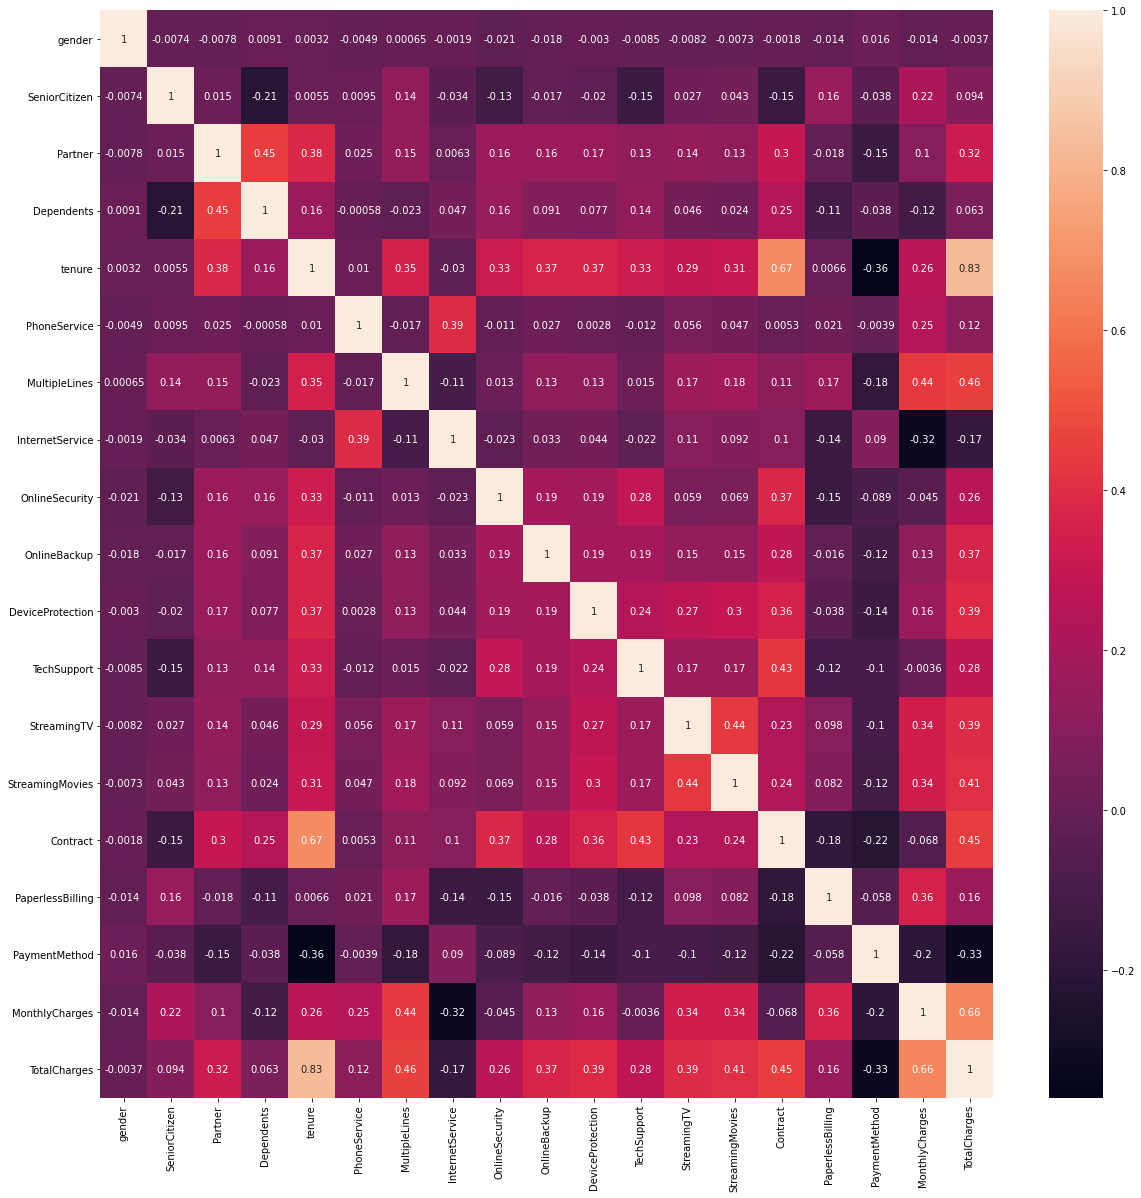

In [34]:
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [35]:
x = df.loc[df['Churn'] == 1]

<AxesSubplot:>

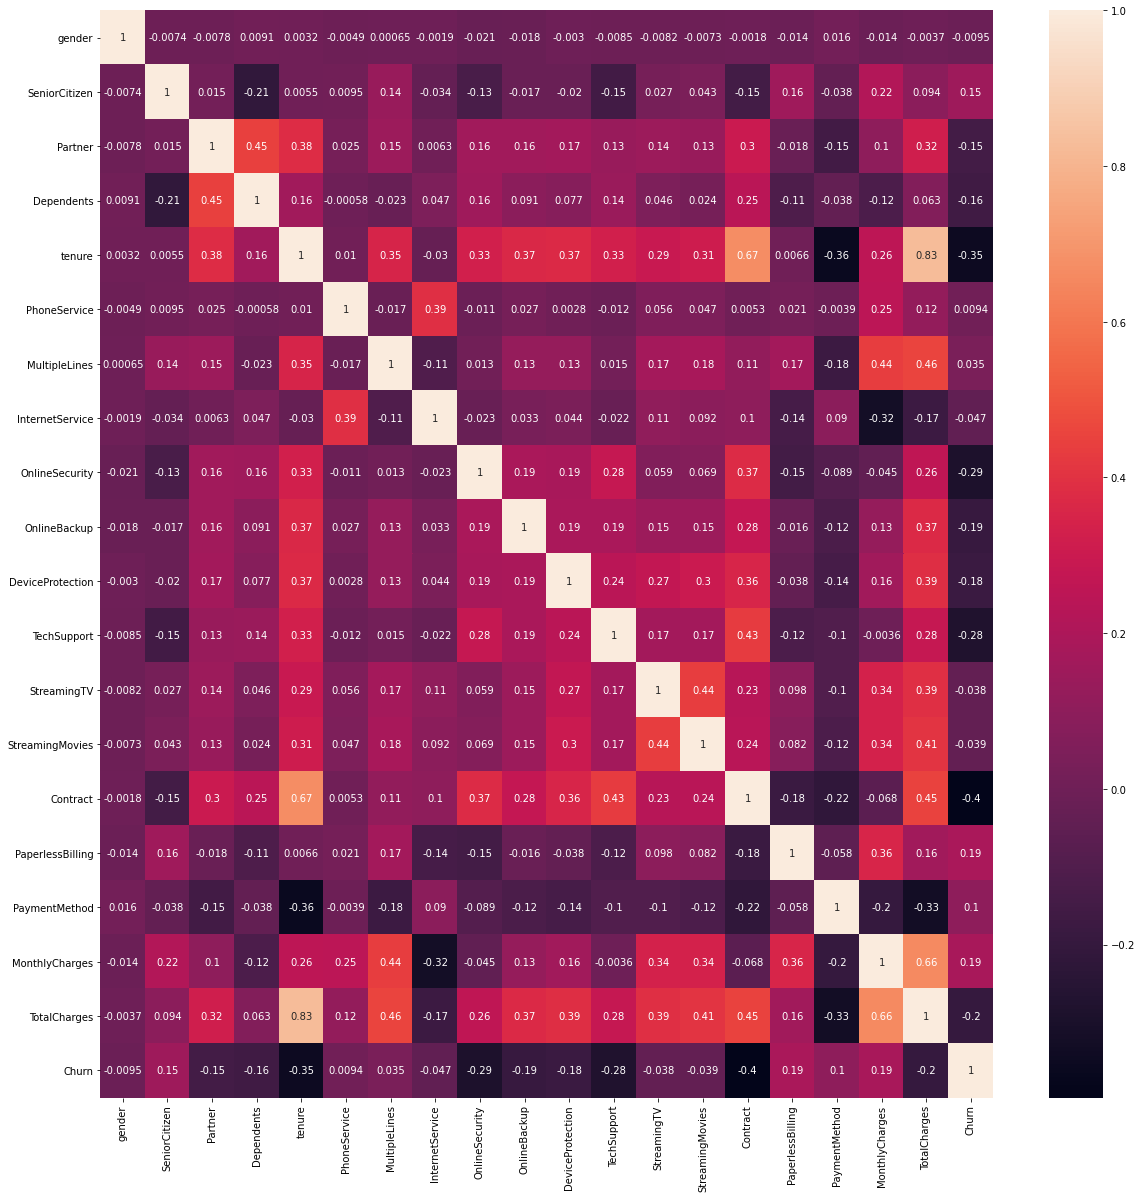

In [36]:
corr=x.iloc[:,:].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [37]:
y = df.loc[df['Churn'] == 0]

<AxesSubplot:>

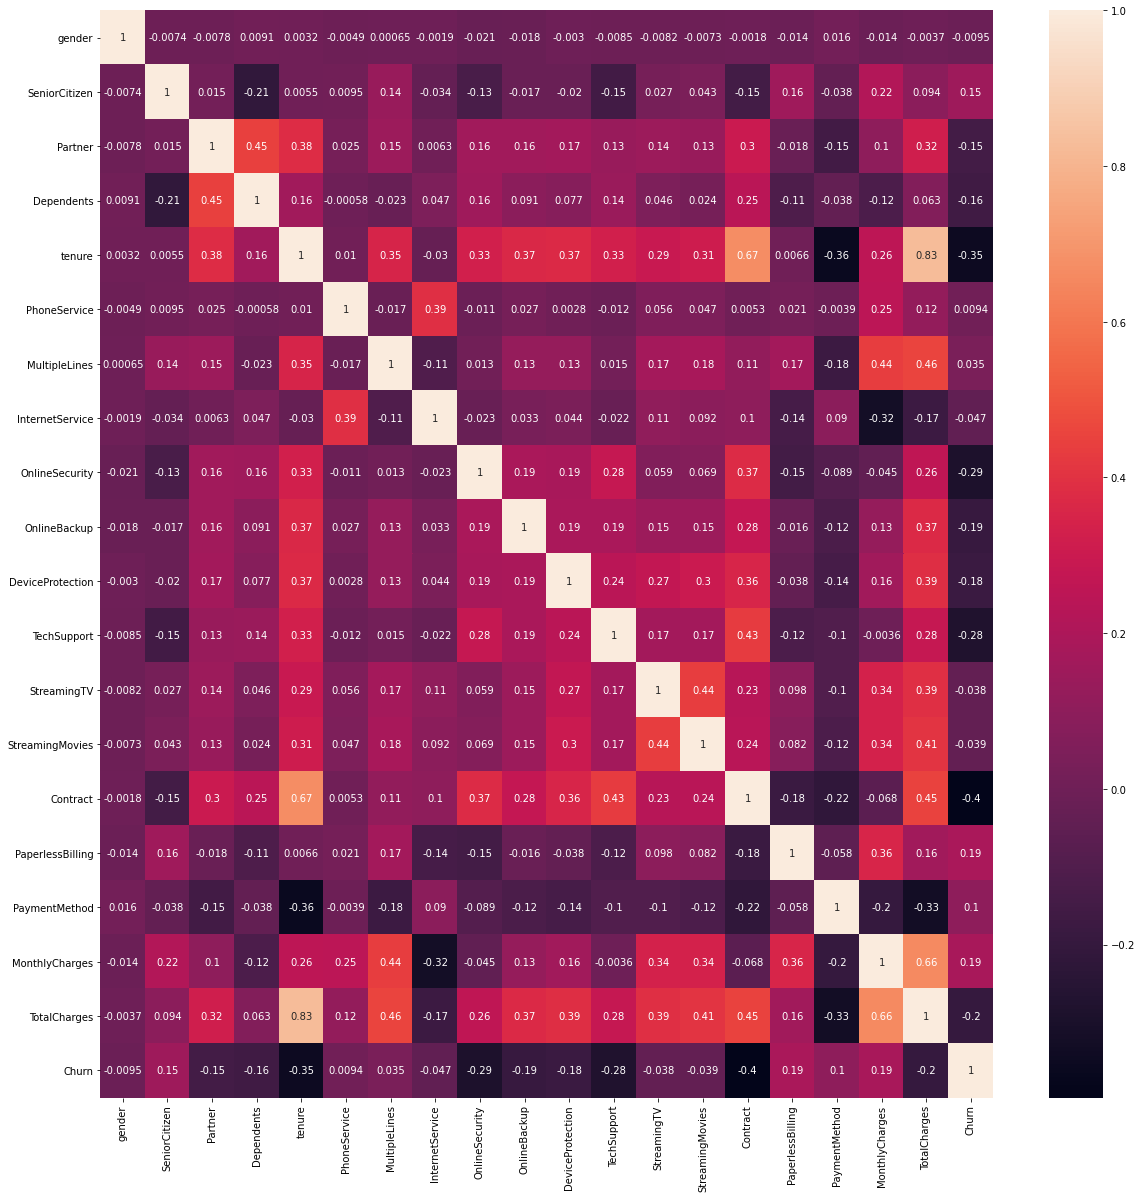

In [38]:
corr=y.iloc[:,:].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [39]:
threshold=0.8

In [40]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [41]:
correlation(df.iloc[:,:-1],threshold)

{'TotalCharges'}

In [42]:
df.drop(columns=[ 'TotalCharges' ], inplace = True)

In [43]:
df.shape

(5986, 19)

In [196]:
X=df.iloc[:,:-1]
y=df['Churn']

In [197]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.00297742, 0.02101651, 0.00408368, 0.01282597, 0.07545029,
       0.00108235, 0.        , 0.04200963, 0.06994456, 0.04399811,
       0.04757558, 0.06658636, 0.0285488 , 0.03531283, 0.11158504,
       0.02068815, 0.0359445 , 0.04967541])

In [198]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Contract            0.111585
tenure              0.075450
OnlineSecurity      0.069945
TechSupport         0.066586
MonthlyCharges      0.049675
DeviceProtection    0.047576
OnlineBackup        0.043998
InternetService     0.042010
PaymentMethod       0.035945
StreamingMovies     0.035313
StreamingTV         0.028549
SeniorCitizen       0.021017
PaperlessBilling    0.020688
Dependents          0.012826
Partner             0.004084
gender              0.002977
PhoneService        0.001082
MultipleLines       0.000000
dtype: float64

<AxesSubplot:>

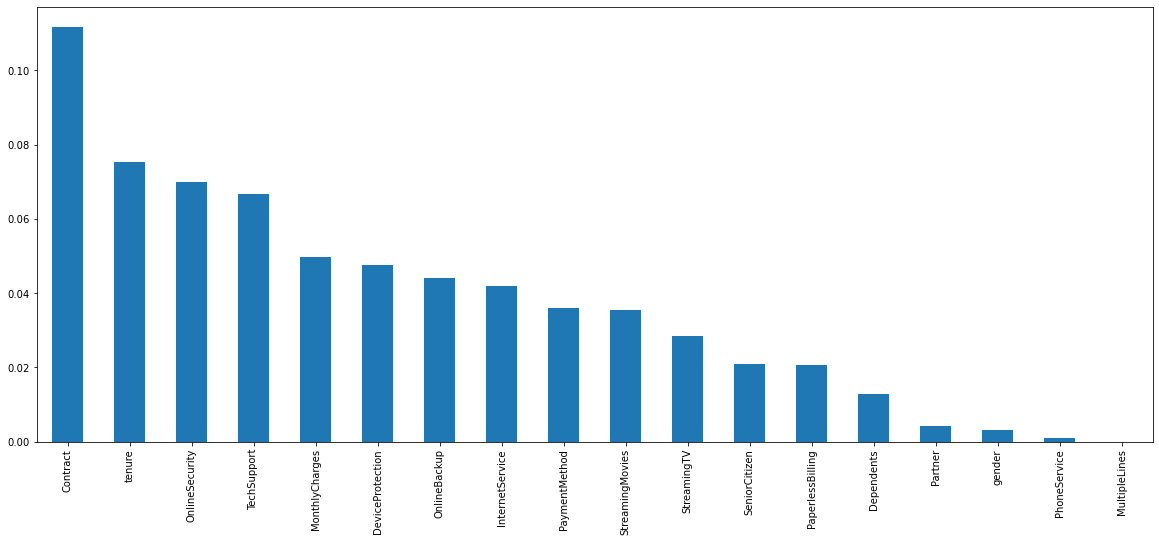

In [199]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Feature Importance

In [200]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [201]:
print(model.feature_importances_)

[0.04102499 0.02740484 0.03389805 0.0268243  0.20923138 0.00716766
 0.02948318 0.03585355 0.04730183 0.03686332 0.02858954 0.04775396
 0.02453353 0.02455033 0.07960979 0.03240915 0.07265353 0.19484706]


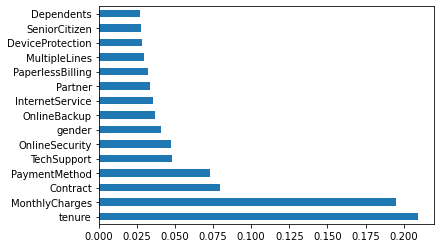

In [203]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [45]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45


In [46]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Churn, dtype: int32

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  #scaling for PCA (principal component analysis)

In [48]:
df_scaled= scaler.fit_transform(X)

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca=PCA(n_components=0.95)
pca_df=pca.fit_transform(df_scaled)

In [51]:
pca_df.shape

(5986, 16)

In [52]:
train=pd.DataFrame(data=pca_df)

In [53]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.149128,-2.184851,-0.603927,-1.333571,-0.371086,1.340085,0.806377,-0.622852,-0.456974,-1.101896,-0.858445,0.091488,0.125488,0.000960,-0.096546,0.361778
1,-0.176138,1.150863,-0.693764,0.652844,-0.519022,-0.992015,-0.408655,-0.061474,-1.587023,0.996980,1.116329,-1.230545,0.006355,1.661618,0.336776,0.187542
2,-1.133764,2.102072,0.606198,-1.921970,-2.183490,-0.341226,1.419103,-0.983208,0.644961,0.173537,-0.740118,0.107380,0.455318,0.043183,-0.108387,-0.506254
3,-2.564196,0.820066,0.121938,0.324552,0.975565,0.658799,-0.905421,-0.499082,0.017611,0.520566,0.138397,0.143100,-0.359533,-1.634737,0.886033,0.261321
4,-2.007025,-1.020018,0.683167,1.034071,-0.191454,0.945003,-0.730738,-0.066958,1.569088,-0.407865,1.758403,-1.492744,-0.854687,0.271632,-0.088234,-0.046747


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split( train, y, test_size=0.2, random_state=42)

In [56]:
y_train.value_counts()

0    3504
1    1284
Name: Churn, dtype: int64

In [57]:
y_test.value_counts()

0    895
1    303
Name: Churn, dtype: int64

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

In [59]:
rf = classifier.fit(X_train,y_train)

In [69]:
prediction=rf.predict(X_test)

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [62]:
def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [63]:
scores = evaluate_model(X_train, y_train, classifier)

In [64]:
scores

array([0.76617954, 0.75052192, 0.77139875, 0.77429467, 0.78787879,
       0.7526096 , 0.77870564, 0.77035491, 0.77324974, 0.77220481,
       0.78392484, 0.76722338, 0.78079332, 0.76907001, 0.77429467])

In [65]:
scores.mean()

0.7715136390177784

In [66]:
score=cross_val_score(classifier,X_train,y_train,cv=10)

In [67]:
score

array([0.78496868, 0.77244259, 0.77870564, 0.73903967, 0.79123173,
       0.75991649, 0.76200418, 0.782881  , 0.76569038, 0.78242678])

In [68]:
score.mean()

0.7719307133934888

In [70]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[788 107]
 [180 123]]
0.7604340567612687
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       895
           1       0.53      0.41      0.46       303

    accuracy                           0.76      1198
   macro avg       0.67      0.64      0.65      1198
weighted avg       0.74      0.76      0.75      1198



In [71]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [72]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [74]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [75]:
best_random_grid=rf_randomcv.best_estimator_

In [76]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[807  88]
 [164 139]]
Accuracy Score 0.7896494156928213
Classification report:               precision    recall  f1-score   support

           0       0.83      0.90      0.86       895
           1       0.61      0.46      0.52       303

    accuracy                           0.79      1198
   macro avg       0.72      0.68      0.69      1198
weighted avg       0.78      0.79      0.78      1198



In [77]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] -1],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [10], 'max_features': ['sqrt'], 'min_samples_leaf': [6, 8, 5], 'min_samples_split': [14, 15, 16], 'n_estimators': [100, 200, 300]}


In [80]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  3.5min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [6, 8, 5],
                         'min_samples_split': [14, 15, 16],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [81]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=16,
                       n_estimators=200)

In [82]:
best_grid=grid_search.best_estimator_

In [83]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=16,
                       n_estimators=200)

In [84]:
y_pred1=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred1)))
print("Classification report: {}".format(classification_report(y_test,y_pred1)))

[[816  79]
 [168 135]]
Accuracy Score 0.7938230383973289
Classification report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87       895
           1       0.63      0.45      0.52       303

    accuracy                           0.79      1198
   macro avg       0.73      0.68      0.70      1198
weighted avg       0.78      0.79      0.78      1198



In [111]:
import optuna
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 100, 150,200)
        max_depth = int(trial.suggest_float('max_depth', 10, 12, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv=3).mean()

In [112]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-03-24 14:50:26,687] A new study created in memory with name: no-name-802c4144-df21-4cac-b418-e6ed6f5ea005
C:\Users\theje\Anaconda3\lib\site-packages\optuna\distributions.py:562: UserWarning: The distribution is specified by [100, 150] and step=200, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
[I 2021-03-24 14:50:31,214] Trial 0 finished with value: 0.7807017543859649 and parameters: {'classifier': 'RandomForest', 'n_estimators': 100, 'max_depth': 10.221093043466743}. Best is trial 0 with value: 0.7807017543859649.
[I 2021-03-24 14:50:33,462] Trial 1 finished with value: 0.7318295739348372 and parameters: {'classifier': 'SVC', 'svc_c': 0.0008375480628112534}. Best is trial 0 with value: 0.7807017543859649.
[I 2021-03-24 14:51:50,224] Trial 2 finished with value: 0.6869256474519633 and parameters: {'classifier': 'SVC', 'svc_c': 31913006.611120045}. Best is trial 0 with value: 0.7807017543859649.
[I 2021-03-24 14:51:50,546] Trial 3 

[I 2021-03-24 14:54:37,296] Trial 32 finished with value: 0.7834168755221387 and parameters: {'classifier': 'SVC', 'svc_c': 0.11337631211478781}. Best is trial 18 with value: 0.7909356725146198.
[I 2021-03-24 14:54:38,431] Trial 33 finished with value: 0.7399749373433583 and parameters: {'classifier': 'SVC', 'svc_c': 326.77721289781107}. Best is trial 18 with value: 0.7909356725146198.
[I 2021-03-24 14:54:38,872] Trial 34 finished with value: 0.7792397660818713 and parameters: {'classifier': 'SVC', 'svc_c': 4.0832771900472835}. Best is trial 18 with value: 0.7909356725146198.
[I 2021-03-24 14:54:39,274] Trial 35 finished with value: 0.7318295739348372 and parameters: {'classifier': 'SVC', 'svc_c': 0.018367179049175775}. Best is trial 18 with value: 0.7909356725146198.
[I 2021-03-24 14:54:39,648] Trial 36 finished with value: 0.7318295739348372 and parameters: {'classifier': 'SVC', 'svc_c': 0.0005943896375276888}. Best is trial 18 with value: 0.7909356725146198.
[I 2021-03-24 14:54:40,0

[I 2021-03-24 14:54:59,702] Trial 68 finished with value: 0.7318295739348372 and parameters: {'classifier': 'SVC', 'svc_c': 0.007568371836207621}. Best is trial 57 with value: 0.7913533834586467.
[I 2021-03-24 14:55:00,152] Trial 69 finished with value: 0.7867585630743524 and parameters: {'classifier': 'SVC', 'svc_c': 1.1079387488760721}. Best is trial 57 with value: 0.7913533834586467.
[I 2021-03-24 14:55:00,577] Trial 70 finished with value: 0.7318295739348372 and parameters: {'classifier': 'SVC', 'svc_c': 0.0004250884689214888}. Best is trial 57 with value: 0.7913533834586467.
[I 2021-03-24 14:55:01,087] Trial 71 finished with value: 0.7907268170426066 and parameters: {'classifier': 'SVC', 'svc_c': 0.6610458992283124}. Best is trial 57 with value: 0.7913533834586467.
[I 2021-03-24 14:55:01,604] Trial 72 finished with value: 0.7754803675856308 and parameters: {'classifier': 'SVC', 'svc_c': 0.0741928442610802}. Best is trial 57 with value: 0.7913533834586467.
[I 2021-03-24 14:55:02,04

Accuracy: 0.7913533834586467
Best hyperparameters: {'classifier': 'SVC', 'svc_c': 0.6420895760594291}


In [143]:
from sklearn.svm import SVC

In [144]:
clf = SVC(gamma='auto')

In [145]:
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [146]:
c_pred=clf.predict(X_test)

In [147]:
scores = evaluate_model(X_train, y_train, clf)

In [148]:
scores

array([0.78392484, 0.77661795, 0.80793319, 0.78578892, 0.79414838,
       0.76096033, 0.79436326, 0.78496868, 0.80041797, 0.79205852,
       0.79853862, 0.80897704, 0.78810021, 0.78787879, 0.77429467])

In [149]:
scores.mean()

0.7892647590293547

In [150]:
score=cross_val_score(clf,X_train,y_train,cv=10)

In [151]:
score

array([0.782881  , 0.78705637, 0.78705637, 0.76617954, 0.78914405,
       0.80167015, 0.81002088, 0.80375783, 0.75941423, 0.79497908])

In [152]:
score.mean()

0.788215948498004

In [153]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,c_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,c_pred)))
print("Classification report: {}".format(classification_report(y_test,c_pred)))

[[788 107]
 [153 150]]
Accuracy Score 0.7829716193656093
Classification report:               precision    recall  f1-score   support

           0       0.84      0.88      0.86       895
           1       0.58      0.50      0.54       303

    accuracy                           0.78      1198
   macro avg       0.71      0.69      0.70      1198
weighted avg       0.77      0.78      0.78      1198



In [157]:
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [158]:
clf.best_estimator_

SVC(C=1, gamma='auto')

In [159]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[788 107]
 [153 150]]
Accuracy Score 0.7829716193656093
Classification report:               precision    recall  f1-score   support

           0       0.84      0.88      0.86       895
           1       0.58      0.50      0.54       303

    accuracy                           0.78      1198
   macro avg       0.71      0.69      0.70      1198
weighted avg       0.77      0.78      0.78      1198



In [160]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [161]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [162]:
classifier=xgboost.XGBClassifier()

In [163]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [164]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    9.7s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.9s finished
C:\Users\theje\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [165]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [166]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [167]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
score=cross_val_score(classifier,X_train,y_train,cv=10)

C:\Users\theje\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [169]:
score

array([0.78496868, 0.81002088, 0.78079332, 0.76409186, 0.7954071 ,
       0.78914405, 0.7954071 , 0.80375783, 0.76359833, 0.79707113])

In [170]:
score.mean()

0.7884260270263188

In [171]:
XGB=classifier.fit(X_train,y_train)

[16:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [172]:
prediction=XGB.predict(X_test)

In [173]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[814  81]
 [170 133]]
0.7904841402337228
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       895
           1       0.62      0.44      0.51       303

    accuracy                           0.79      1198
   macro avg       0.72      0.67      0.69      1198
weighted avg       0.78      0.79      0.78      1198



In [206]:
prediction.shape

(1198,)

In [207]:
y_test.shape

(1198,)

In [208]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
4872,-1.184419,1.701684,-0.497814,-1.150739,-0.017761,1.085648,1.363237,0.172752,1.203153,1.272111,-0.277730,0.477078,-0.061437,-1.600998,1.253413,-0.331225
5790,0.117833,2.148011,-0.754517,-0.995903,1.340980,0.767839,-0.250535,-0.425949,-0.159357,-0.936689,-0.828042,0.643294,-0.528823,-0.076624,0.930561,-1.009983
3670,2.965112,-0.492453,-0.787554,-0.400709,1.282031,0.710027,-0.171130,-0.108328,-0.500362,0.748424,1.898450,0.726123,1.243419,-0.010090,0.156191,0.215271
1609,1.904984,1.479223,0.301561,-0.972910,-1.990106,1.463622,0.872282,1.354315,0.399716,0.446842,-1.108826,0.678765,-1.320635,1.609775,0.747141,0.125640
5799,-0.325811,0.272933,2.416672,0.355877,1.950557,0.787200,1.514722,-1.189243,-0.812317,0.380726,-0.471861,-1.396869,-0.154562,1.710640,0.533183,-1.092873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,-3.497250,-0.691751,0.409240,0.270369,0.307897,0.922941,-0.535746,0.166420,0.451191,-0.687467,0.918012,0.294959,0.354540,0.080813,1.078900,0.243330
2503,1.714158,-1.712276,0.754247,0.738355,-0.360306,0.903502,-0.866967,1.847815,0.861577,0.086892,0.233696,1.470908,0.039437,-1.610792,2.043261,-0.587246
4792,-2.089950,1.567116,-0.162602,0.069973,-1.579402,-0.570119,1.224491,-1.304591,0.867597,1.631656,0.844805,-1.540262,0.573016,0.191661,-0.667479,0.626528
3994,2.488667,-0.687696,0.233496,-1.444919,-0.689647,-0.798963,-0.283443,0.061852,-0.960205,-0.933935,-0.083084,1.855460,1.634479,1.484506,0.309967,0.587346


In [209]:
df2=pca.inverse_transform(pca_df)

In [213]:
df3=scaler.inverse_transform(df2)

In [215]:
df3

array([[ 1.00235202e+00, -1.35815930e-03,  1.01303654e+00, ...,
        -1.59955839e-03,  9.80969378e-01,  2.97389890e+01],
       [ 4.45859605e-03,  1.67528710e-02,  4.90765390e-02, ...,
         1.03493189e+00,  9.17799677e-01,  8.28341816e+01],
       [ 1.20278720e-03,  1.00234188e+00,  1.01049435e+00, ...,
         1.00514632e+00, -1.69783873e-02,  7.53191903e+01],
       ...,
       [ 1.00189556e+00, -3.56245109e-03,  1.00739555e+00, ...,
         9.93863337e-01,  1.99055227e+00,  2.77382990e+01],
       [ 9.98142692e-01,  9.90742187e-01, -2.33167125e-02, ...,
         9.80971751e-01,  2.03968110e+00,  1.03551758e+02],
       [ 1.00009237e+00, -1.88226831e-03, -1.79356496e-03, ...,
        -3.65530749e-03,  1.00361740e+00,  2.15360128e+01]])

In [216]:
df4 = pd.DataFrame(df3, columns = [X.columns])

In [217]:
df4

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,1.002352,-0.001358,1.013037,0.993890,66.444191,0.971648,1.989100,2.067495,1.007443,1.011432,0.989055,0.987252,0.962566,0.967455,2.181800,-0.001600,0.980969,29.738989
1,0.004459,0.016753,0.049077,-0.034754,29.703224,1.048385,0.160414,0.840503,0.007131,2.075048,2.021321,-0.056352,2.057472,0.056692,0.372949,1.034932,0.917800,82.834182
2,0.001203,1.002342,1.010494,-0.006765,34.567359,1.001546,2.022874,0.989357,0.002710,0.014232,0.001012,-0.011576,0.001034,0.001956,0.097419,1.005146,-0.016978,75.319190
3,0.999769,-0.017964,-0.024095,0.022298,8.071450,0.907155,-0.168482,0.262519,0.005802,-0.051105,-0.038316,0.031391,-0.116581,1.892347,-0.044389,0.964609,2.045060,70.332601
4,0.999374,-0.009416,-0.015792,0.013347,5.382198,0.955874,-0.088704,0.127462,2.001551,-0.030043,1.981629,0.019673,-0.055016,-0.051234,-0.062678,-0.018780,2.028395,60.047112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0.995910,0.000602,0.975113,0.012734,11.003390,1.040000,0.002466,0.908809,1.987694,-0.024738,0.015201,0.025098,2.053397,2.045811,-0.318697,0.999325,2.037291,86.652026
5982,-0.009571,-0.034887,0.896005,1.073316,53.481122,0.901820,1.665726,0.326380,1.984304,1.841868,1.956573,2.119179,1.883779,1.884894,1.200968,0.927127,1.173890,101.619890
5983,1.001896,-0.003562,1.007396,0.998035,8.003152,0.964110,-0.031905,2.091099,1.006889,1.002397,0.985808,0.993835,0.953432,0.958655,0.142901,0.993863,1.990552,27.738299
5984,0.998143,0.990742,-0.023317,0.017210,18.399540,0.967801,1.911824,1.100337,-0.002148,-0.037557,1.986158,0.027270,1.960914,1.962424,-0.158698,0.980972,2.039681,103.551758


In [218]:
X_train, X_test, y_train, y_test = train_test_split( df4, y, test_size=0.2, random_state=42)

In [219]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
4872,1.004640,1.015446,1.048566,-0.033784,31.509206,1.039850,0.148314,0.863578,0.008138,0.072610,0.017862,-0.055333,0.046601,2.046822,0.385198,1.032448,1.919201,76.513963
5790,1.004748,0.006833,1.038387,-0.023813,37.919412,0.993362,2.067702,0.993853,0.011568,0.049520,-0.001253,-0.041680,1.988059,1.992950,0.381028,1.015578,1.938733,98.104342
3670,1.004532,0.027569,1.063170,0.952038,51.415239,1.104879,0.261801,0.681121,0.003442,2.105391,2.044614,1.925169,2.128459,2.122187,1.394518,0.056210,0.891295,91.618056
1609,0.995148,0.995685,0.964136,0.021136,77.847037,1.020878,1.955807,0.966613,1.987216,1.956763,0.007086,0.038150,2.029927,0.023542,1.614549,0.989320,1.056241,86.961287
5799,0.996105,-0.008955,0.964286,0.023552,36.383652,-0.012254,0.913076,0.054860,-0.008281,-0.049877,1.993737,0.039772,1.987538,-0.014734,0.682501,0.980640,1.058257,38.039998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1.000197,-0.008949,-0.010044,0.010080,2.255009,0.950937,-0.083687,0.137056,0.003814,-0.023441,-0.020148,0.013643,-0.061848,-0.056845,0.002302,-0.017488,3.019488,53.389253
2503,1.001170,0.001088,1.008706,-0.005153,66.893817,0.995221,0.011103,0.007333,2.003064,2.010555,-0.001604,1.990724,-0.006895,1.994620,2.092985,0.002669,2.986328,69.293520
4792,-0.003430,1.002114,-0.018840,0.008748,9.074897,1.042049,0.017149,0.899590,-0.010901,-0.016298,2.016250,0.018365,0.055473,0.048275,-0.264889,1.002596,0.027429,66.966693
3994,-0.001397,0.014164,1.009095,0.987614,67.697639,1.087419,2.131612,0.761266,-0.009243,2.030100,0.035573,1.985328,2.110990,0.101143,1.911604,0.027186,0.979426,79.689989


In [220]:
X_test.shape

(1198, 18)

In [226]:
df5 = pd.DataFrame(prediction, columns = ['Churn'])
df5.head()

,Churn
0,1
1,0
2,0
3,0
4,0
